# **Projeto de aprendizado de máquina - SCC0530 - Inteligência Artificial**

| Integrantes do grupo | Número USP  |
|------|------|
|Rodrigo Teixeira Ribeiro da Silva|11816164|
|João Pedro Alonso|11816164|
|Allan Baldissin|11816164|

## **Índice**
1. Descrição do projeto
2. Operações com os datasets
    1. Nome do dataset
    2. Nome do dataset
    3. Nome do dataset
    4. Nome do dataset
    5. Nome do dataset
    6. Nome do dataset
    7. Nome do dataset
    8. Nome do dataset
    9. Nome do dataset
    10. Nome do dataset
3. Conclusão

In [46]:
# Importações

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

----
# 1. Descrição do projeto

O relatório a seguir será composto da seguinte forma para cada um dos datasets:
- **Seção 1** - Descrição do dataset.

- **Selção 2** - Aplicação dos pré-processamentos 

- **Seção 3** - Seleção da medida(s) de avaliação mais adequada aos datasets selecionados.

- **Seção 4** - Utilização de validação cruzada (10-fold cross validation) nos experimentos.

- **Seção 5** - Aplicação dos seguintes algoritmos de classificação com diferentes configurações (hiperparâmetros): K-Nearest Neighbors (KNN), Naive Bayes, Árvores de Decisão e Multilayer Perceptron (MLP).

- **Seção 6** - Verificação do melhor por meio da diferença absoluta conforme os slides de aula.


----
# 2. Operações com os datasets

## 2.1. - Drugs A, B, C, X, Y for Decision Trees
**Mais informações sobre o dataset:** <a href="https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees">Clique aqui.</a>

2.1.1 - Descrição do dataset

O dataset a seguir contém dados sobre pacientes que sofreram da mesma doença. Durante o tratamento, cada paciente respondeu a um entre cinco medicamentos: A, B, C, X e Y.

Cada paciente possui os seguintes dados: idade, sexo, pressão sanguínea e colesterol, e o medicamente a qual cada paciente reagiu. A análise a seguir buscará prever qual medicamento será apropriada para um futuro paciente.

In [47]:
# 2.1.2. - Operações com o dataset

# Importante e imprimindo dataset
df = pd.read_csv('data/dataset_1/drug200.csv', sep=',', na_values='?')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [48]:
# Pré-processamentos

# Primeiro os dados serão divididos entre colunas numéricas e não númericas
not_numeric = df.iloc[:, [1,2,3,5]]
numeric = df.iloc[:,[0, 4]]
not_numeric

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,drugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,drugY
...,...,...,...,...
195,F,LOW,HIGH,drugC
196,M,LOW,HIGH,drugC
197,M,NORMAL,HIGH,drugX
198,M,NORMAL,NORMAL,drugX


In [49]:
# Agora será utilizado o label encoder para transformar as colunas da tabela "not_numeric"

enc_not_numeric = not_numeric.copy()
for col in not_numeric.columns:
    lb = LabelEncoder()
    enc_not_numeric[col] = lb.fit_transform(not_numeric[col].values)
enc_not_numeric

,Sex,BP,Cholesterol,Drug
0,0,0,0,4
1,1,1,0,2
2,1,1,0,2
3,0,2,0,3
4,0,1,0,4
...,...,...,...,...
195,0,1,0,2
196,1,1,0,2
197,1,2,0,3
198,1,2,1,3


In [50]:
# E por fim os dados serão concetenados novamente na tabela

data = pd.concat([numeric, enc_not_numeric], axis = 1)
data

,Age,Na_to_K,Sex,BP,Cholesterol,Drug
0,23,25.355,0,0,0,4
1,47,13.093,1,1,0,2
2,47,10.114,1,1,0,2
3,28,7.798,0,2,0,3
4,61,18.043,0,1,0,4
...,...,...,...,...,...,...
195,56,11.567,0,1,0,2
196,16,12.006,1,1,0,2
197,52,9.894,1,2,0,3
198,23,14.020,1,2,1,3


In [51]:
# Através das visualizações acima, é possível dizer que a droga Y é consumida por todas as idaedes e contém o maior valor de Na_to_K
fig = px.scatter(df, x="Age", y="Cholesterol" , color = "Age" )
fig.show()

In [52]:
## 2.1.3 - Avaliação dos dados

# Avaliando a distribuição dos dados
data.describe()

,Age,Na_to_K,Sex,BP,Cholesterol,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,16.084485,0.520000,0.910000,0.485000,2.870000
std,16.544315,7.223956,0.500854,0.821752,0.501029,1.372047
min,15.000000,6.269000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,10.445500,0.000000,0.000000,0.000000,2.000000
50%,45.000000,13.936500,1.000000,1.000000,0.000000,3.000000
75%,58.000000,19.380000,1.000000,2.000000,1.000000,4.000000
max,74.000000,38.247000,1.000000,2.000000,1.000000,4.000000


In [53]:
# Checando por dados nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Na_to_K      200 non-null    float64
 2   Sex          200 non-null    int64  
 3   BP           200 non-null    int64  
 4   Cholesterol  200 non-null    int64  
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [54]:
# Cheacando por dados duplicados
data.duplicated().sum()

0

<AxesSubplot:xlabel='Drug', ylabel='count'>

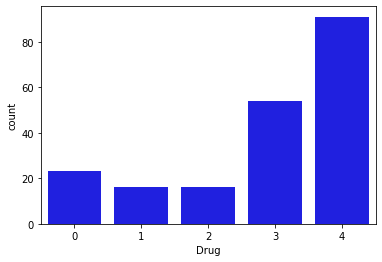

In [55]:
# Visualizado o dado alvo (resposta a ser obtida)
sns.countplot(x = data['Drug'], color= 'blue')

In [56]:
# Dividindo os dados entre os dados alvo (as drogas) e as variáveis que serão utilizadas para tomada de decisão
X = data.drop('Drug', axis = 1)
y = data['Drug']

In [57]:

## 2.1.4 - Utilização das validações cruzadas

# Construção do modelo para árvore de decisão
clf = DecisionTreeClassifier()

# Definição dos parâmetros para validação cruzada
param_dist = {'max_depth': [None, 2, 3, 4, 5, 6],
             'criterion': ['gini', 'entropy'],
             'min_samples_split': [5, 10, 12],
             'max_leaf_nodes': [10, 15, 20, None]}

rcv = RandomizedSearchCV(clf, param_distributions = param_dist, n_iter = 10, cv = 5)
rcv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 3, 4, 5, 6],
                                        'max_leaf_nodes': [10, 15, 20, None],
                                        'min_samples_split': [5, 10, 12]})

In [58]:
## 2.1.5 - Aplicação dos algoritmos de classificação

# Melhor acurácia de algoritmo de classificação
rcv.best_score_

0.985

In [59]:
# Melhor algoritmo de classificação
rcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=20,
                       min_samples_split=5)

In [60]:
# Melhores parâmetros para classificação
rcv.best_params_

{'min_samples_split': 5,
 'max_leaf_nodes': 20,
 'max_depth': 6,
 'criterion': 'entropy'}

In [61]:
# Definição da função de avaliação do modelo
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(5,5)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')
    
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Contruindo a avaliação com o melhor modelo descoberto
dt = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 15, min_samples_split = 12).fit(X_train, y_train)

In [62]:
## 2.1.6 - Avaliação do modelo

# Score da árvore de decisão com o melhor modelo aplicado
dt.score(X_train, y_train), dt.score(X_test, y_test)

(1.0, 0.98)

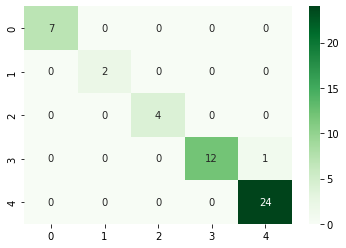

In [63]:
# Como visto, o modelo obteve quase 100% de acurácia tanto para o dataset de treinamento quanto para o de testes.

# A figura abaixo vai mostrar como o modelo preveu os valores e também as contagens, sendo que os blocos na diagonal são
# os valores corretamente previstos e os outros valores são os previstos de maneira errada.

model_evaluation(dt)


## 2.2. Nome do dataset
**Mais informações sobre o dataset:** <a href="http://localhost:3000">Clique aqui.</a>

2.2.1 - Descrição do dataset

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla diam ipsum, venenatis ut felis blandit, pretium aliquam purus. Proin vulputate dictum interdum. Aliquam fermentum lacus eget nulla interdum lacinia. Nulla facilisi. Mauris fringilla erat vitae erat cursus suscipit. Integer viverra mi nec sapien accumsan laoreet eu in odio. Nam lorem massa, consectetur quis leo cursus, gravida faucibus dui. Vivamus commodo cursus erat, ac hendrerit elit varius non. Maecenas rhoncus est eros, congue varius eros auctor vitae.

In [64]:
## 2.2.2 - Pré-processamento

## 2.2.3 - Avaliação dos dados

## 2.2.4 - Utilização das validações cruzadas

## 2.2.5 - Aplicação dos algoritmos de classificação

## 2.2.6 - Avaliação do modelo

----
# 3. Conclusão

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Proin eu mauris volutpat, commodo urna quis, elementum libero. Integer mollis mollis lacus. Nullam rutrum eros vel vestibulum pretium. Mauris arcu nisl, sagittis quis ex eget, ultricies faucibus metus. Sed lorem enim, commodo sed elementum sit amet, porta ut nunc. Sed tristique porta consectetur. Integer ex velit, pulvinar sit amet laoreet id, scelerisque eu nunc